### Задание 1.

Сгенерируйте выборку $X_1, ..., X_N$ из стандартного нормального распределения для
$N = 10^4.$ Для всех $n\leq N$ посчитайте по ней эмпирическую
функцию распределения. Для некоторых $n$ (например, $n \in \{10, 25,
50, 100, 1000, N\}$) постройте графики эмпи\-рической функции
распределения (отметьте на оси абсцисс точки "скачков" кривых,
нанеся каждую из "подвыборок" на ось абсцисс на каждом
соответствующем графике с коэффициентом прозрачности 0.2), нанеся на
каждый из них истинную функцию распределения (количество графиков
равно количеству различныз значений $n$). 

Будет полезно: https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html

(Должна получиться картина, как в конце презентации https://edu.tinkoff.ru/course/181/unit/5064/view)

# Решение

In [45]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# %config InlineBackend.figure_format ='retina' 

## Функция для выделения подвыборки и отрисовки cdf на графике

In [46]:
def cdf_visual(X, n):
    X_n = np.sort(X[:n])
    cdf = np.linspace(0 + 1 / n, 1, n)
    
    plt.figure(figsize=(14,7))
    plt.grid(color='grey',
             linestyle=':')
    plt.title('Эмпирическая функция распределения, n = ' + str(n))    
    plt.step(X_n, cdf, where='post')
    grid = np.linspace(st.norm.ppf(0.001), st.norm.ppf(0.999), n)
    plt.plot(grid, st.norm.cdf(grid))
    plt.scatter(X_n, np.zeros(n)-0.04, alpha=0.2)
    plt.show()
    

## Результаты выполнения

In [47]:
N = 10000
X = st.norm.rvs(size=N)

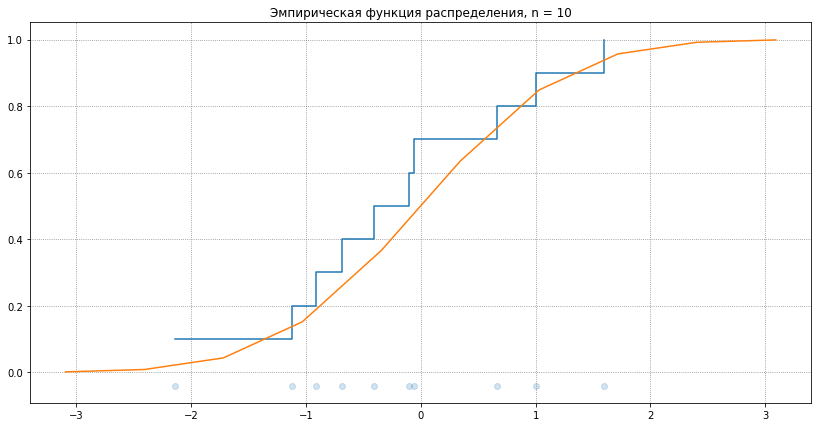

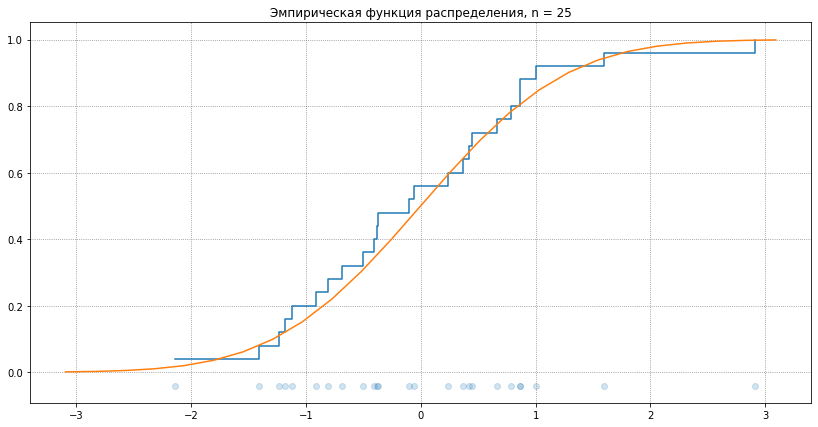

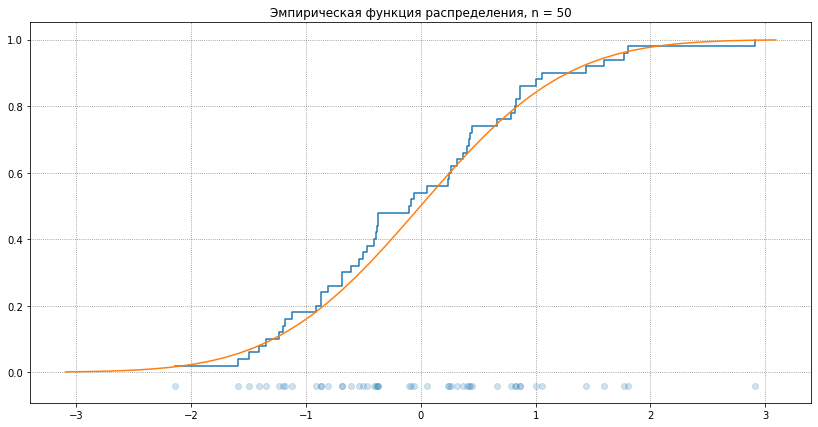

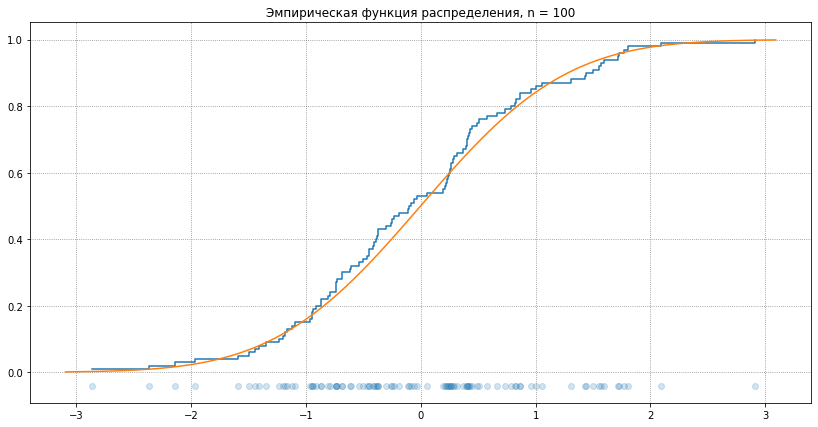

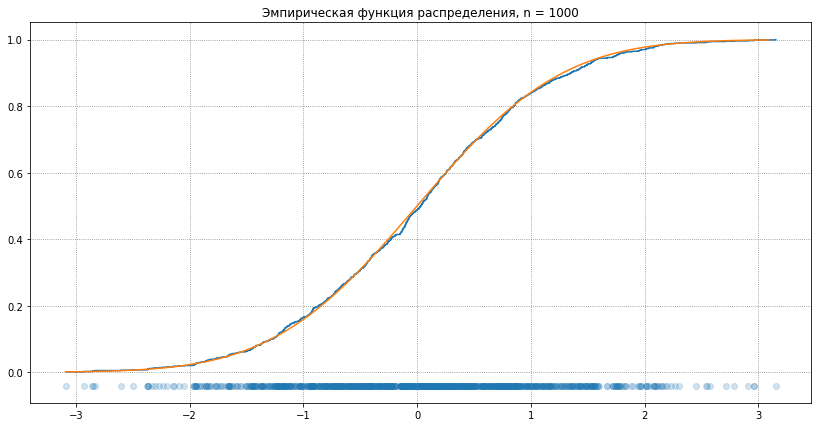

In [48]:
cdf_visual(X, 10)
cdf_visual(X, 25)
cdf_visual(X, 50)
cdf_visual(X, 100)
cdf_visual(X, 1000)

### Задание 2. Задача Бюффона о бросании иглы

Классическая формулировка задачи выглядит так:

На разлинованный лист бумаги, расстояния между линиями $r=1$ бросают иглы длиной $L < r$. Какова вероятность того, что игла попадет на линию? 

Для этой задачи существует теоретическое решение:

$$p = \dfrac{2L}{r\pi}\ \ \ \ \ (1)$$.

**Задание**

Проведем эксперимент, найдем вероятность пересечения иглой линии из эксперимента. С помощью теоретического решения найдем значение числа $\pi$.

https://ru.wikipedia.org/wiki/Задача_Бюффона_о_бросании_иглы

Сгенерируем две случайные величины $X1$ и $Y1$ из равномерного распределения. Это будут координаты одно из концов иглы. Сгенерируем случайную величину $\alpha$ из $U[0, 2\pi]$, она будет отвечать за угол между иглой и горизонтальной осью. Так как длина иглы $L$ задана изначально, то координаты конца иглы:

$$X_2 = X_1 + L \cdot \cos(\alpha)$$
$$Y_2 = Y_1 + L \cdot \sin(\alpha)$$

Отобразите на полотне отрезки, соответсвующие каждой игле. Проведите горизонтальные линии, пригодится https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hlines.html. (Должна получиться картина, как в конце презентации https://edu.tinkoff.ru/course/181/unit/5064/view)

Так как расстояние между горизонтальными линиями 1, то пересечение иглы с линией можно найти так: спроецируем иглы на вертикальную ось, получим отрезки $[y_2, y_1]$. Если в пределах отрезка $[y_2, y_1]$ лежит целое число, значит проекция, а соотвественно и игла, пересекают горизонтальную ось. Найдем долю игл, пересекающий горизонтальную линию. Эта доля и будет оценкой вероятности в формуле (1). Зная вероятность, из формулы (1) можно выразить значение числа $\pi$.


# Решение

In [5]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

## Функция для расчёта экспериментального значения $\pi$ и вывода рисунка разброса иголок

In [8]:
# N - число иголок, r - расстояние между линиями, L - длина иголки
def needle_drop(N, r, L):
    # Генерация иголок
    X1 = st.uniform.rvs(size=N, loc=1, scale=18)
    Y1 = st.uniform.rvs(size=N, loc=1, scale=8)
    Alpha = st.uniform.rvs(size=N, loc=0, scale=2 * np.pi)    
    X2 = X1 + L * np.cos(Alpha)
    Y2 = Y1 + L * np.sin(Alpha)
    X = np.vstack((X1, X2))
    Y = np.vstack((Y1, Y2))
    
    # Вероятность пересечения иголкой горизонтальной линии
    Y1fl = np.floor(Y1)                  
    Y2fl = np.floor(Y2)
    mask = Y2fl != Y1fl
    cross_numb = (mask == True).sum()
    p = cross_numb / N
    pi = 2 * L / (r * p)
    print("Экспериментальное значение Пи:", pi)
    
    plt.figure(figsize=(10, 7))
    lines = np.arange(1, 10, r)
    plt.hlines(lines, 0, 20, color='black')
    plt.plot(X, Y, color='orange')
    plt.show()

## Результаты выполнения функции

Экспериментальное значение Пи: 4.0


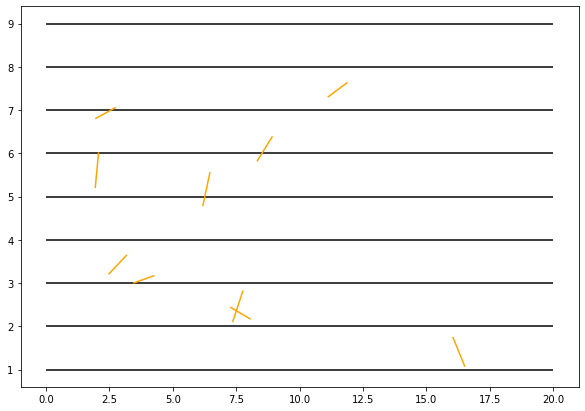

Экспериментальное значение Пи: 3.3962264150943398


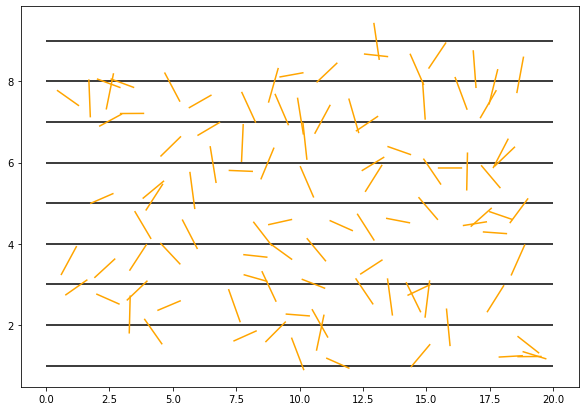

Экспериментальное значение Пи: 3.1034482758620694


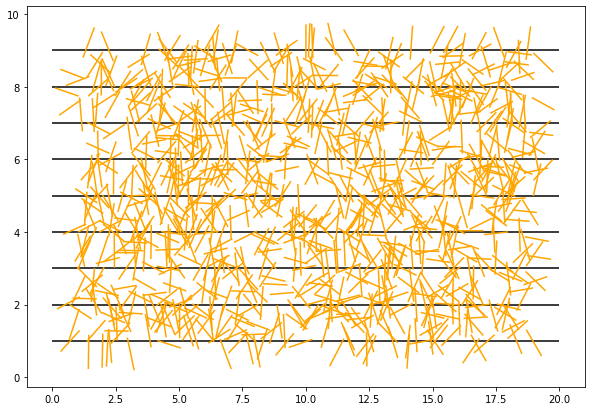

In [10]:
needle_drop(10, 1, 0.8)
needle_drop(100, 1, 0.9)
needle_drop(1000, 1, 0.9)